In [21]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize #machine learning algorithm library
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import f1_score
import pandas as pd
import scipy as sp
import numpy as np


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns; 
sns.set(style="ticks", color_codes=True)

import keras
#Neural network module
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils
from keras.regularizers import l2
from keras.utils.vis_utils import plot_model
from keras.wrappers.scikit_learn import KerasClassifier

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA

In [2]:
# read in the dataset Gluon
file_name_g = open('Data/g1M.out','r')
data_gluon=[]
for line in file_name_g.readlines():
    data_gluon.append(line.strip().split())
file_name_g.close()
# read in the dataset Quark
file_name_q = open('Data/q1M.out','r')
data_quark=[]
for line in file_name_q.readlines():
    data_quark.append(line.strip().split())
file_name_q.close()

In [3]:
#create a DataFrame, we transform the imported data in Dataframe
df_gluon=pd.DataFrame(data_gluon)
df_quark=pd.DataFrame(data_quark)

In [4]:
#concatenate the both dataset. we combine the quark set and gluon set in the same data set
data=pd.concat([df_gluon,df_quark])
#A Brief description of the dataset
data.describe()

,0,1,2,3,4,5
count,1256966,1256966,1256966,1256966,1237968,1237968
unique,735801,10010,625283,613577,708139,3
top,Event,0.1,(1,elapsed),0,1
freq,19736,678143,738,18998,62,699717


In [5]:
#From the above description, we observed taht the data set containt a string "Event", we have to clean. 
data[data[0].str.contains('Event')].count()

0    19736
1    19736
2    19736
3    19736
4      738
5      738
dtype: int64

In [6]:
#Clean data
data=data[data[0]!='Event']
#we print the first 5 elements of the data set
data.head()

,0,1,2,3,4,5
0,0.0755577,0.2,0.189465,0.104326,0.0544762,0
1,0.0639362,0.1,0.184013,0.058119,0.0475469,0
2,0.0369286,0.1,0.139499,0.446972,0.0292832,0
3,0.167616,0.2,0.383354,0.309005,0.11008,0
4,0.218167,0.2,0.345461,0.128316,0.110414,0


In [7]:
#Let check if the data is cleaned without the string "Event"
data[data[0].str.contains('Event')].count()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [8]:
#Count % of missing values in the data set
miss=data.isnull().sum()/len(data)*100
miss

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
dtype: float64

In [9]:
#Then we give a description of the cleaned data set 
data.describe()

,0,1,2,3,4,5
count,1237230,1237230,1237230,1237230,1237230,1237230
unique,735800,11,607358,613575,707401,2
top,0.115561,0.1,0,0,0,1
freq,12,678143,62,594,62,699717


# Data vizualisation

In [10]:
#rename column by using the name of variables that describe the event
data.rename(columns={0:'nmass',1:'nsub',2:'lha',3:'zg',4:'ci',5:'origin'},inplace=True)
#we print the five first element
data.head()

,nmass,nsub,lha,zg,ci,origin
0,0.0755577,0.2,0.189465,0.104326,0.0544762,0
1,0.0639362,0.1,0.184013,0.058119,0.0475469,0
2,0.0369286,0.1,0.139499,0.446972,0.0292832,0
3,0.167616,0.2,0.383354,0.309005,0.11008,0
4,0.218167,0.2,0.345461,0.128316,0.110414,0


In [11]:
data[data['origin']=='1'].head()

,nmass,nsub,lha,zg,ci,origin
0,0.19139,0.2,0.330619,0.133954,0.0798613,1
1,0.0815474,0.2,0.18474,0.0582754,0.0418687,1
2,0.523645,0.3,0.744298,0.363179,0.257981,1
3,0.036144,0.1,0.0860477,0.115329,0.0154145,1
4,0.284085,0.2,0.398111,0.123903,0.107648,1


In [12]:
#Since all the variables are numeric, we convert in float to allow a good analysis 
data['nmass'] = data['nmass'].astype(np.float)
data['nsub'] = data['nsub'].astype(np.float)
data['lha'] = data['lha'].astype(np.float)
data['zg'] = data['zg'].astype(np.float)
data['ci'] = data['ci'].astype(np.float)

In [13]:
cleaned_quark=data[data["origin"]=='1']
cleaned_gluon=data[data["origin"]=='0']

# Distribution

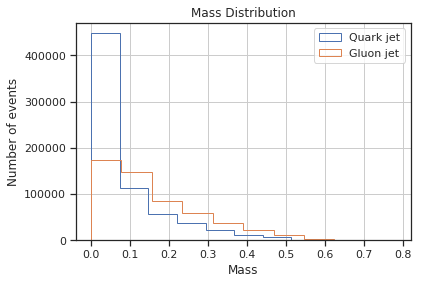

In [14]:
#Mass distribution
plt.title("Mass Distribution")
plt.hist(cleaned_quark["nmass"],  label='Quark jet', histtype='step', alpha=1.0)
plt.hist(cleaned_gluon["nmass"], label='Gluon jet',histtype='step', alpha=1.0)
plt.xlabel("Mass")
plt.ylabel("Number of events")
plt.legend()
plt.grid()
plt.savefig("mass.png")
plt.show()

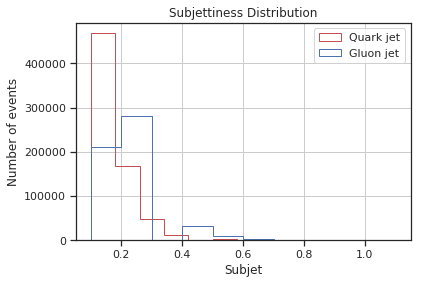

In [15]:
#Subjet distribution
plt.title("Subjettiness Distribution")
plt.hist(cleaned_quark["nsub"],  label='Quark jet', histtype='step', color='r', alpha=1.0)
plt.hist(cleaned_gluon["nsub"], label='Gluon jet',histtype='step', color='b', alpha=1.0)
plt.xlabel("Subjet")
plt.ylabel("Number of events")
plt.legend()
plt.grid()
plt.savefig("nsub.png")
plt.show()

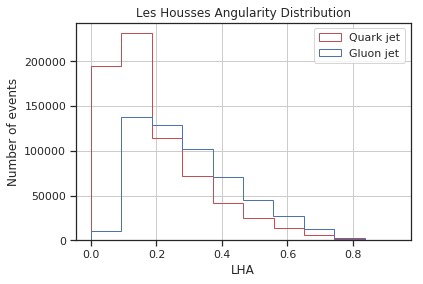

In [16]:
#Les housses distribution
plt.title("Les Housses Angularity Distribution")
plt.hist(cleaned_quark["lha"],  label='Quark jet', histtype='step', color='r', alpha=1.0)
plt.hist(cleaned_gluon["lha"], label='Gluon jet',histtype='step', color='b', alpha=1.0)
plt.xlabel("LHA")
plt.ylabel("Number of events")
plt.legend()
plt.grid()
plt.savefig("lha.png")
plt.show()

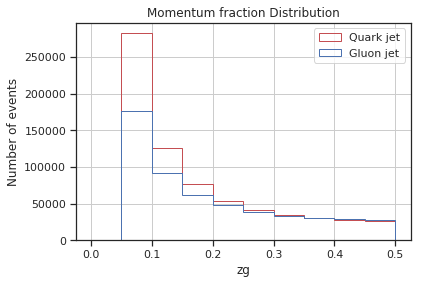

In [17]:
#Momentum distribution
plt.title("Momentum fraction Distribution")
plt.hist(cleaned_quark["zg"],  label='Quark jet', histtype='step', color='r', alpha=1.0)
plt.hist(cleaned_gluon["zg"], label='Gluon jet',histtype='step', color='b', alpha=1.0)
plt.xlabel("zg")
plt.ylabel("Number of events")
plt.legend()
plt.grid()
plt.savefig("zg.png")
plt.show()

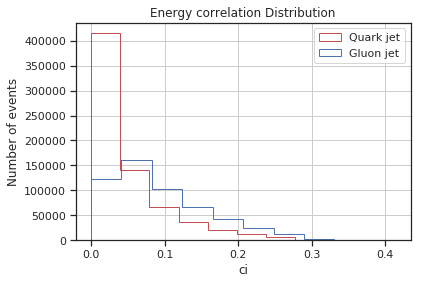

In [18]:
#Energy correlation distribution
plt.title("Energy correlation Distribution")
plt.hist(cleaned_quark["ci"],  label='Quark jet', histtype='step', color='r', alpha=1.0)
plt.hist(cleaned_gluon["ci"], label='Gluon jet',histtype='step', color='b', alpha=1.0)
plt.xlabel("ci")
plt.ylabel("Number of events")
plt.legend()
plt.grid()
plt.savefig("ci.png")
plt.show()

In [19]:
X=data.iloc[:,:5]
y=data.iloc[:,5].values
#We print the first 0 elements of the label data
int_y = [int(x[0]) for x in y]
Y_target = np.array(int_y,dtype='int64')
print(Y_target)
Y=Y_target.astype('uint8')

[0 0 0 ... 1 1 1]


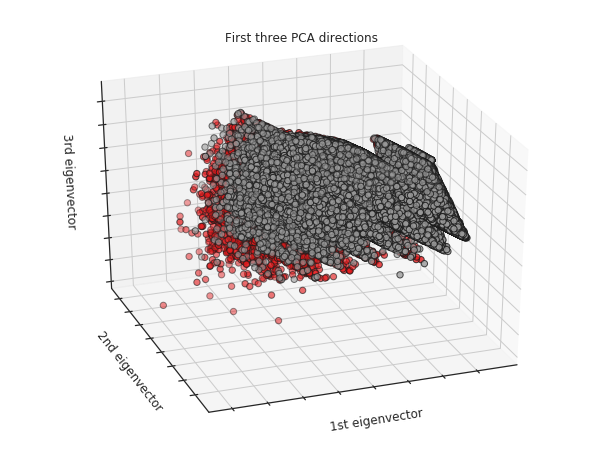

In [22]:
#Data vizualisation in 3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.savefig("dataset.png")
plt.show()

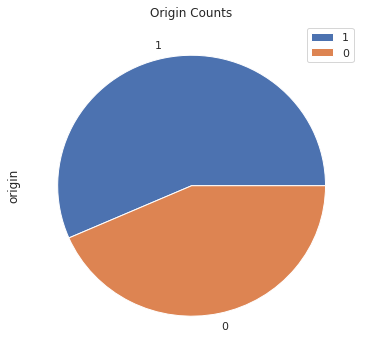

In [23]:
# Create a data frame of origin counts
originCounts = data['origin'].value_counts()
# Plot a pie chart
originCounts.plot(kind='pie', title='Origin Counts', figsize=(6,6))
plt.legend()
plt.show()

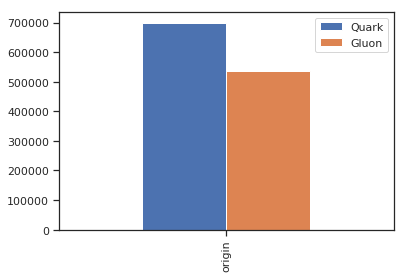

In [27]:
a =  data['origin'].value_counts()
b = pd.DataFrame(a)
#b['origin'][1]

b
k = {'Quark': b['origin'][0] , 'Gluon':  b['origin'][1]}

kk = pd.DataFrame(k, index = ['origin'])
kk.plot.bar()

Without count, we can see that, in the above pie chart, the number of event originated by quark are more than half. 

In [28]:
#Then we show the detail of the data set
data.describe()

,nmass,nsub,lha,zg,ci
count,1.237230e+06,1.237230e+06,1.237230e+06,1.237230e+06,1.237230e+06
mean,1.225441e-01,1.678671e-01,2.409006e-01,1.800407e-01,7.047976e-02
std,1.137312e-01,9.168743e-02,1.554552e-01,1.244589e-01,6.203327e-02
min,-1.623530e-07,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.989105e-02,1.000000e-01,1.142990e-01,7.817433e-02,2.279933e-02
50%,7.539155e-02,1.000000e-01,2.006510e-01,1.334795e-01,4.907790e-02
75%,1.732657e-01,2.000000e-01,3.320427e-01,2.558070e-01,9.984700e-02
max,7.801230e-01,1.100000e+00,9.290270e-01,5.000000e-01,4.135660e-01


In [29]:
#We print the first fives elements of the data set
data.head()

,nmass,nsub,lha,zg,ci,origin
0,0.075558,0.2,0.189465,0.104326,0.054476,0
1,0.063936,0.1,0.184013,0.058119,0.047547,0
2,0.036929,0.1,0.139499,0.446972,0.029283,0
3,0.167616,0.2,0.383354,0.309005,0.110080,0
4,0.218167,0.2,0.345461,0.128316,0.110414,0


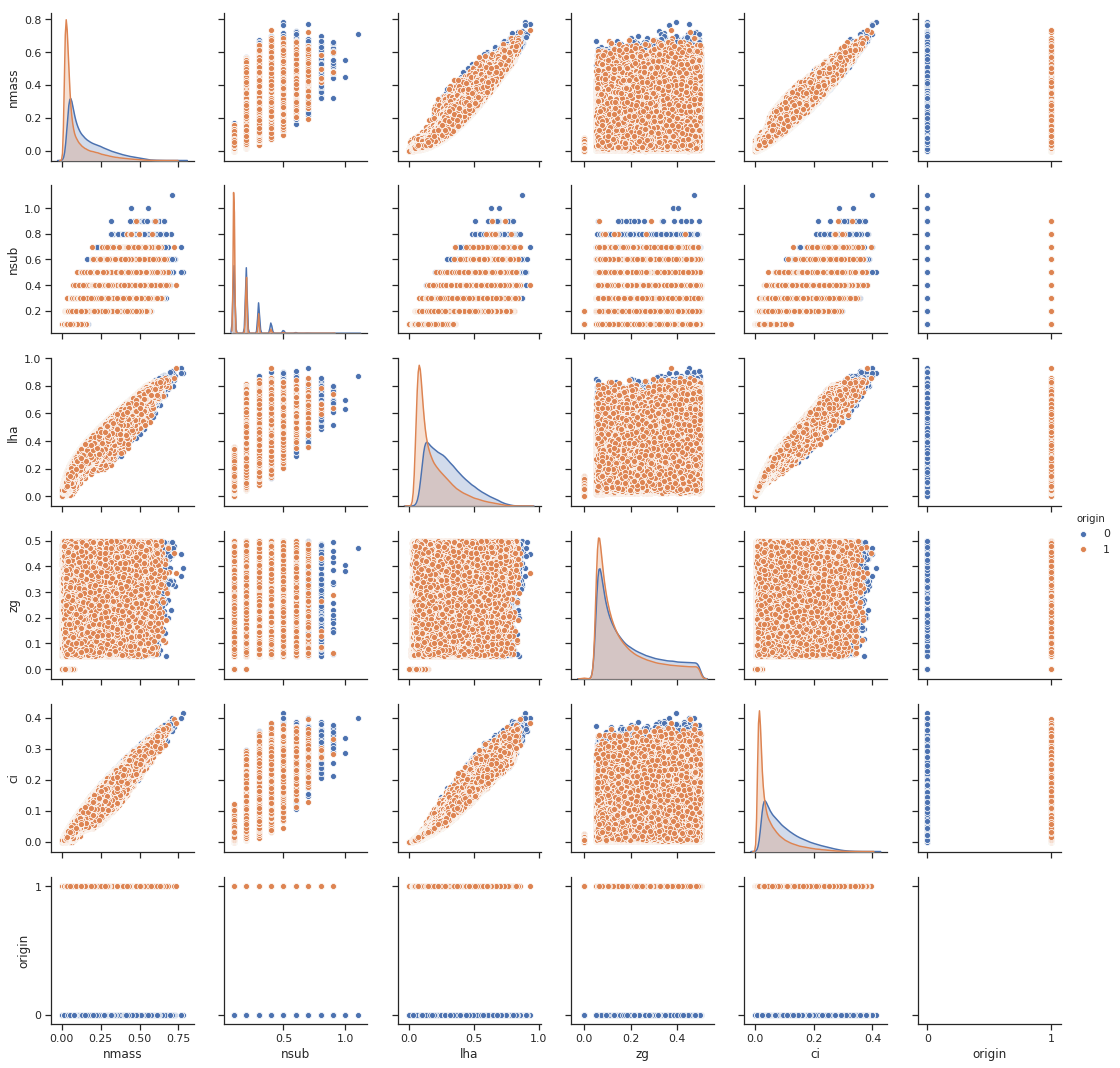

In [31]:
#correlation between variables
g=sns.pairplot(data, hue="origin", height= 2.5)

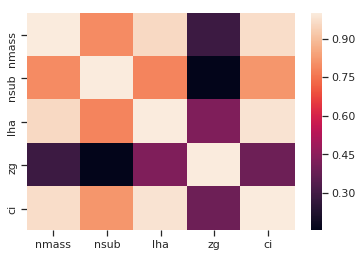

In [16]:
#Correlaion test between variables
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [33]:
# To start with the network we need to converting data to numpy array 
X=data.iloc[:,:5].values#we extact only the feature
y=data.iloc[:,5].values#we extract only the label

In [34]:
print(X[:10])#We print the first 10 element of the features data set

[[0.0755577 0.2       0.189465  0.104326  0.0544762]
 [0.0639362 0.1       0.184013  0.058119  0.0475469]
 [0.0369286 0.1       0.139499  0.446972  0.0292832]
 [0.167616  0.2       0.383354  0.309005  0.11008  ]
 [0.218167  0.2       0.345461  0.128316  0.110414 ]
 [0.526424  0.2       0.705519  0.423706  0.280389 ]
 [0.0913633 0.2       0.190319  0.0550395 0.0569352]
 [0.112613  0.2       0.229782  0.125332  0.0655758]
 [0.503168  0.4       0.697395  0.113624  0.291295 ]
 [0.0267763 0.1       0.120125  0.100771  0.0247467]]


In [35]:
#We print the first 0 elements of the label data
int_y = [int(x[0]) for x in y]
y = np.array(int_y,dtype='int64')
print(y[:10])

[0 0 0 0 0 0 0 0 0 0]


In [36]:
#We test that the length of the features are the same with the labels
print("Shape of X",X.shape)#
print("Shape of y",y.shape)

Shape of X (1237230, 5)
Shape of y (1237230,)


#Training will be in two step: non normalized data and normalized data

In [37]:
#data normalization
X_normalized=normalize(X,axis=0)
print("X_normalised:\n",X_normalized[:5])

X_normalised:
 [[0.0004063  0.00094004 0.00059411 0.00042853 0.00052162]
 [0.00034381 0.00047002 0.00057702 0.00023873 0.00045527]
 [0.00019858 0.00047002 0.00043743 0.00183597 0.00028039]
 [0.00090133 0.00094004 0.0012021  0.00126926 0.00105405]
 [0.00117316 0.00094004 0.00108328 0.00052707 0.00105724]]


In [38]:
#We split the data set by taking 80% of data for training and 20% for testing. Note we use a rondom sampling
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=1)

In [39]:
#Check the length of the train set correspond to 80% and 20% the test.
print("Length of train set x:",X_train.shape[0],"y:",y_train.shape[0])
print("Length of test set x:",X_test.shape[0],"y:",y_test.shape[0])

Length of train set x: 989784 y: 989784
Length of test set x: 247446 y: 247446


# Build Model

# Train without normalization

In [40]:
#We split the data set by taking 80% for the training and 20% for tesing
X_trainNN, X_testNN, y_trainNN, y_testNN = train_test_split(X, y, test_size=0.2, random_state=1)

In [43]:
#Basis network architecture 
model = Sequential()
model.add(Dense(10, input_dim=5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


In [44]:
#We split the data set by taking 80% for the training and 20% for tesing
X_trainN, X_testN, y_trainN, y_testN = train_test_split(X, y, test_size=0.2, random_state=1)

In [45]:
#We train  the model with a non-normalized data
model_outputN=model.fit(X_trainN,y_trainN,validation_data=(X_testN,y_testN),batch_size=20,epochs=10,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 989784 samples, validate on 247446 samples
Epoch 1/10
989784/989784 [==============================] - 100s 101us/step - loss: 0.5570 - acc: 0.6907 - val_loss: 0.5296 - val_acc: 0.7275
Epoch 2/10
989784/989784 [==============================] - 94s 95us/step - loss: 0.5159 - acc: 0.7447 - val_loss: 0.5069 - val_acc: 0.7534
Epoch 3/10
989784/989784 [==============================] - 96s 97us/step - loss: 0.5022 - acc: 0.7554 - val_loss: 0.4960 - val_acc: 0.7612
Epoch 4/10
989784/989784 [==============================] - 95s 96us/step - loss: 0.4949 - acc: 0.7600 - val_loss: 0.4913 - val_acc: 0.7631
Epoch 5/10
989784/989784 [==============================] - 96s 97us/step - loss: 0.4919 - acc: 0.7615 - val_loss: 0.4898 - val_acc: 0.7633
Epoch 6/10
989784/989784 [==============================] - 96s 97us/step - loss: 0.4907 - acc: 0.7617 - val_loss: 0.4913 - val_acc: 0.7628
Epoch 7/10
989784/989784 [==============================] 

In [47]:
#Evaluate accuracy and test
test_loss, test_acc = model.evaluate(X_testNN,y_testNN)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

247446/247446 [==============================] - 5s 20us/step
Test accuracy: 0.7640939841410311
Test loss: 0.4877943909920847


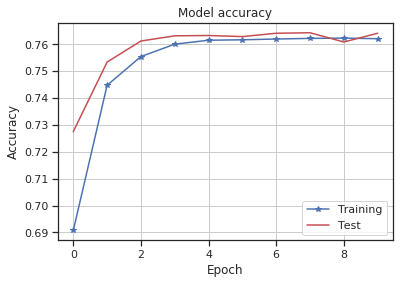

In [48]:
# Plot training & validation accuracy values
plt.plot(model_outputN.history['acc'],'*-',label='Training')
plt.plot(model_outputN.history['val_acc'],'r-', label='Test')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.grid(True)
plt.savefig("test1.png")
plt.show()

In [49]:
#Increasing  epochs
model_outputNN1=model.fit(X_trainNN,y_trainNN,validation_data=(X_testNN,y_testNN),batch_size=20,epochs=20,verbose=1)

Train on 989784 samples, validate on 247446 samples
Epoch 1/20
989784/989784 [==============================] - 94s 95us/step - loss: 0.4892 - acc: 0.7624 - val_loss: 0.4876 - val_acc: 0.7643
Epoch 2/20
989784/989784 [==============================] - 93s 94us/step - loss: 0.4891 - acc: 0.7623 - val_loss: 0.4872 - val_acc: 0.7640
Epoch 3/20
989784/989784 [==============================] - 93s 94us/step - loss: 0.4891 - acc: 0.7623 - val_loss: 0.4874 - val_acc: 0.7635
Epoch 4/20
989784/989784 [==============================] - 95s 96us/step - loss: 0.4889 - acc: 0.7623 - val_loss: 0.4881 - val_acc: 0.7638
Epoch 5/20
989784/989784 [==============================] - 95s 96us/step - loss: 0.4888 - acc: 0.7623 - val_loss: 0.4877 - val_acc: 0.7649
Epoch 6/20
989784/989784 [==============================] - 96s 97us/step - loss: 0.4887 - acc: 0.7625 - val_loss: 0.4881 - val_acc: 0.7637
Epoch 7/20
989784/989784 [==============================] - 94s 95us/step - loss: 0.4885 - acc: 0.7625 - val

In [50]:
#Evaluate accuracy and test
test_loss, test_acc = model.evaluate(X_testNN,y_testNN)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

247446/247446 [==============================] - 5s 20us/step
Test accuracy: 0.7614671483884129
Test loss: 0.4903744200389932


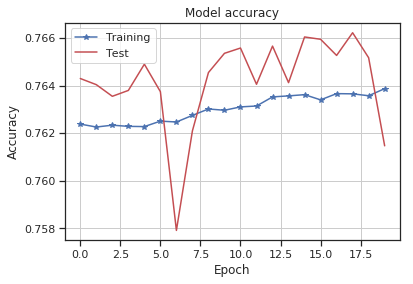

In [51]:
# Plot training & validation accuracy values
plt.plot(model_outputNN1.history['acc'],'*-',label='Training')
plt.plot(model_outputNN1.history['val_acc'],'r-', label='Test')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.grid(True)
plt.savefig("test2.png")
plt.show()

In [52]:
#Adding hidden layer
HIDEEN=128
model2 = Sequential()
model2.add(Dense(HIDEEN, input_dim=5))
model2.add(Activation('relu'))
model2.add(Dense(HIDEEN))
model2.add(Activation('relu'))
model2.add(Dense(1))
model2.add(Activation('sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               768       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________________________


In [53]:
#We train  the model with a non-normalized data
model_outputNN2=model2.fit(X_trainNN,y_trainNN,validation_data=(X_testNN,y_testNN),batch_size=128,epochs=20,verbose=1)

Train on 989784 samples, validate on 247446 samples
Epoch 1/20
989784/989784 [==============================] - 28s 28us/step - loss: 0.5096 - acc: 0.7442 - val_loss: 0.4862 - val_acc: 0.7663
Epoch 2/20
989784/989784 [==============================] - 27s 27us/step - loss: 0.4892 - acc: 0.7619 - val_loss: 0.4858 - val_acc: 0.7644
Epoch 3/20
989784/989784 [==============================] - 27s 27us/step - loss: 0.4876 - acc: 0.7630 - val_loss: 0.4831 - val_acc: 0.7679
Epoch 4/20
989784/989784 [==============================] - 26s 26us/step - loss: 0.4866 - acc: 0.7633 - val_loss: 0.4830 - val_acc: 0.7659
Epoch 5/20
989784/989784 [==============================] - 27s 27us/step - loss: 0.4859 - acc: 0.7638 - val_loss: 0.4831 - val_acc: 0.7662
Epoch 6/20
989784/989784 [==============================] - 27s 27us/step - loss: 0.4856 - acc: 0.7640 - val_loss: 0.4815 - val_acc: 0.7680
Epoch 7/20
989784/989784 [==============================] - 27s 27us/step - loss: 0.4850 - acc: 0.7643 - val

In [54]:
#Evaluate accuracy and test
test_loss, test_acc = model2.evaluate(X_testNN,y_testNN)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

247446/247446 [==============================] - 8s 32us/step
Test accuracy: 0.7699417246571905
Test loss: 0.47839897367290446


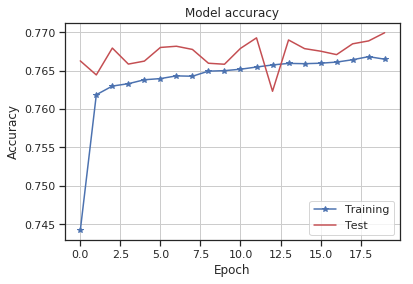

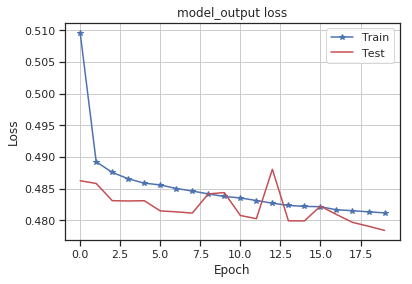

In [56]:
# Plot training & validation accuracy values
plt.plot(model_outputNN2.history['acc'],'*-',label='Training')
plt.plot(model_outputNN2.history['val_acc'],'r-', label='Test')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.grid(True)
plt.savefig("test3.png")
plt.show()

# Plot training & validation loss values
plt.plot(model_outputNN2.history['loss'],'*-',label='Training Loss')
plt.plot(model_outputNN2.history['val_loss'],'r-', label='Validation loss')
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.savefig("loss3.png")
plt.show()

In [29]:
#Decreasing hidden layer
HIDEEN=64
model64 = Sequential()
model64.add(Dense(HIDEEN, input_dim=5))
model64.add(Activation('relu'))
model64.add(Dense(HIDEEN))
model64.add(Activation('relu'))
model64.add(Dense(1))
model64.add(Activation('sigmoid'))
model64.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model64.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                384       
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
activation_5 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
_________________________________________________________________
activation_6 (Activation)    (None, 1)                 0         
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


In [30]:
#We train  the model with a non-normalized data
model_outputNN64=model64.fit(X_trainNN,y_trainNN,validation_data=(X_testNN,y_testNN),batch_size=64,epochs=20,verbose=1)

Train on 1113507 samples, validate on 123723 samples
Epoch 1/20
1113507/1113507 [==============================] - 43s 38us/step - loss: 0.5090 - acc: 0.7443 - val_loss: 0.4849 - val_acc: 0.7666
Epoch 2/20
1113507/1113507 [==============================] - 43s 39us/step - loss: 0.4899 - acc: 0.7614 - val_loss: 0.4858 - val_acc: 0.7646
Epoch 3/20
1113507/1113507 [==============================] - 40s 36us/step - loss: 0.4879 - acc: 0.7625 - val_loss: 0.4851 - val_acc: 0.7659
Epoch 4/20
1113507/1113507 [==============================] - 42s 38us/step - loss: 0.4869 - acc: 0.7630 - val_loss: 0.4845 - val_acc: 0.7672
Epoch 5/20
1113507/1113507 [==============================] - 43s 39us/step - loss: 0.4862 - acc: 0.7635 - val_loss: 0.4930 - val_acc: 0.7580
Epoch 6/20
1113507/1113507 [==============================] - 43s 38us/step - loss: 0.4859 - acc: 0.7637 - val_loss: 0.4808 - val_acc: 0.7680
Epoch 7/20
1113507/1113507 [==============================] - 44s 39us/step - loss: 0.4851 - ac

In [31]:
#We print the training accuracy by taking the mean of all accuracy
print('Training Accuracy : ' , np.mean(model_outputNN64.history["acc"]))
print('Validation Accuracy : ' , np.mean(model_outputNN64.history["val_acc"]))
test_loss, test_acc = model64.evaluate(X_testNN,y_testNN)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Training Accuracy :  0.7638391586227151
Validation Accuracy :  0.7671694026191118
123723/123723 [==============================] - 3s 27us/step
Test accuracy: 0.7687172150715552
Test loss: 0.48012291281295544


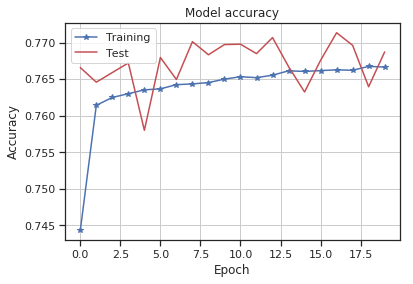

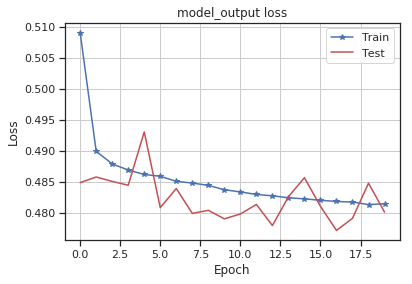

In [32]:
# Plot training & validation accuracy values
plt.plot(model_outputNN64.history['acc'],'*-',label='Training')
plt.plot(model_outputNN64.history['val_acc'],'r-', label='Test')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.grid(True)
plt.savefig("test64.png")
plt.show()

# Plot training & validation loss values
plt.plot(model_outputNN64.history['loss'],'*-',label='Training Loss')
plt.plot(model_outputNN64.history['val_loss'],'r-', label='Validation loss')
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.savefig("loss64.png")
plt.show()

In [34]:
#Adding dropout
HIDEEN=128
OUTPUT=1
DROPOUT=0.3
modelDrop = Sequential()
modelDrop.add(Dense(HIDEEN, input_dim=5))
modelDrop.add(Activation('relu'))
modelDrop.add(Dropout(DROPOUT))
modelDrop.add(Dense(HIDEEN))
modelDrop.add(Activation('relu'))
modelDrop.add(Dropout(DROPOUT))
modelDrop.add(Dense(OUTPUT))
modelDrop.add(Activation('sigmoid'))
modelDrop.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelDrop.summary()
plot_model(modelDrop, to_file='model.png', show_shapes=True, show_layer_names=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               768       
_________________________________________________________________
activation_10 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_11 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 129       
__________

In [35]:
#We train  the model with a non-normalized data
model_outputNNDrop=modelDrop.fit(X_trainNN,y_trainNN,validation_data=(X_testNN,y_testNN),batch_size=128,epochs=20,verbose=1)

Train on 1113507 samples, validate on 123723 samples
Epoch 1/20
1113507/1113507 [==============================] - 34s 31us/step - loss: 0.5178 - acc: 0.7374 - val_loss: 0.4859 - val_acc: 0.7673
Epoch 2/20
1113507/1113507 [==============================] - 32s 29us/step - loss: 0.4964 - acc: 0.7575 - val_loss: 0.4845 - val_acc: 0.7678
Epoch 3/20
1113507/1113507 [==============================] - 34s 31us/step - loss: 0.4952 - acc: 0.7585 - val_loss: 0.4849 - val_acc: 0.7659
Epoch 4/20
1113507/1113507 [==============================] - 36s 32us/step - loss: 0.4940 - acc: 0.7593 - val_loss: 0.4822 - val_acc: 0.7689
Epoch 5/20
1113507/1113507 [==============================] - 33s 30us/step - loss: 0.4932 - acc: 0.7597 - val_loss: 0.4857 - val_acc: 0.7680
Epoch 6/20
1113507/1113507 [==============================] - 38s 34us/step - loss: 0.4927 - acc: 0.7602 - val_loss: 0.4828 - val_acc: 0.7692
Epoch 7/20
1113507/1113507 [==============================] - 32s 29us/step - loss: 0.4922 - ac

In [36]:
test_loss, test_acc = modelDrop.evaluate(X_testNN,y_testNN)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

123723/123723 [==============================] - 4s 32us/step
Test accuracy: 0.7698730228033431
Test loss: 0.48023542724466367


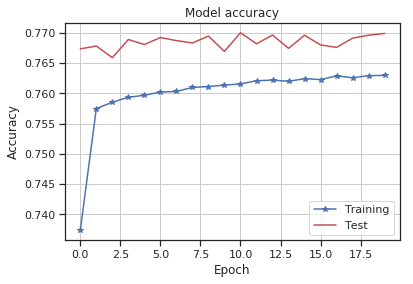

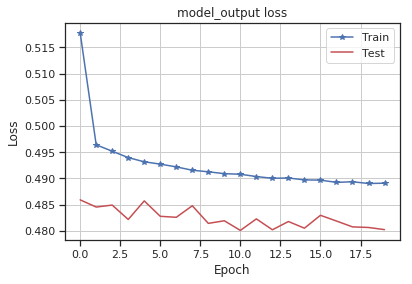

In [37]:
# Plot training & validation accuracy values
plt.plot(model_outputNNDrop.history['acc'],'*-',label='Training')
plt.plot(model_outputNNDrop.history['val_acc'],'r-', label='Test')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.grid(True)
plt.savefig("test64.png")
plt.show()

# Plot training & validation loss values
plt.plot(model_outputNNDrop.history['loss'],'*-',label='Training Loss')
plt.plot(model_outputNNDrop.history['val_loss'],'r-', label='Validation loss')
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.savefig("loss64.png")
plt.show()

In [19]:
model_outputNNDropp=modelDrop.fit(X_trainNN,y_train,validation_data=(X_testNN,y_test),batch_size=128,epochs=10,verbose=1)

Train on 989784 samples, validate on 247446 samples
Epoch 1/10
989784/989784 [==============================] - 46s 47us/step - loss: 0.4895 - acc: 0.7626 - val_loss: 0.4836 - val_acc: 0.7662
Epoch 2/10
989784/989784 [==============================] - 46s 46us/step - loss: 0.4894 - acc: 0.7625 - val_loss: 0.4826 - val_acc: 0.7671
Epoch 3/10
989784/989784 [==============================] - 46s 46us/step - loss: 0.4891 - acc: 0.7630 - val_loss: 0.4865 - val_acc: 0.7634
Epoch 4/10
989784/989784 [==============================] - 46s 47us/step - loss: 0.4891 - acc: 0.7628 - val_loss: 0.4820 - val_acc: 0.7671
Epoch 5/10
989784/989784 [==============================] - 46s 46us/step - loss: 0.4890 - acc: 0.7629 - val_loss: 0.4825 - val_acc: 0.7675
Epoch 6/10
989784/989784 [==============================] - 46s 47us/step - loss: 0.4889 - acc: 0.7629 - val_loss: 0.4829 - val_acc: 0.7660
Epoch 7/10
989784/989784 [==============================] - 46s 47us/step - loss: 0.4886 - acc: 0.7633 - val

In [38]:
#Increasing epochs
model_outputNNDrop1=modelDrop.fit(X_trainNN,y_trainNN,validation_data=(X_testNN,y_testNN),batch_size=128,epochs=50,verbose=1)

Train on 1113507 samples, validate on 123723 samples
Epoch 1/50
1113507/1113507 [==============================] - 37s 33us/step - loss: 0.4888 - acc: 0.7630 - val_loss: 0.4803 - val_acc: 0.7696
Epoch 2/50
1113507/1113507 [==============================] - 38s 34us/step - loss: 0.4888 - acc: 0.7631 - val_loss: 0.4827 - val_acc: 0.7688
Epoch 3/50
1113507/1113507 [==============================] - 37s 33us/step - loss: 0.4886 - acc: 0.7631 - val_loss: 0.4794 - val_acc: 0.7704
Epoch 4/50
1113507/1113507 [==============================] - 33s 30us/step - loss: 0.4884 - acc: 0.7632 - val_loss: 0.4807 - val_acc: 0.7682
Epoch 5/50
1113507/1113507 [==============================] - 29s 26us/step - loss: 0.4885 - acc: 0.7632 - val_loss: 0.4803 - val_acc: 0.7699
Epoch 6/50
1113507/1113507 [==============================] - 30s 27us/step - loss: 0.4885 - acc: 0.7632 - val_loss: 0.4817 - val_acc: 0.7681
Epoch 7/50
1113507/1113507 [==============================] - 37s 33us/step - loss: 0.4882 - ac

In [40]:
#Evaluate accuracy
test_loss, test_acc = modelDrop.evaluate(X_testNN,y_testNN)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

123723/123723 [==============================] - 4s 34us/step
Test accuracy: 0.7702690688093404
Test loss: 0.4805863416518754


In [25]:
y_pred = modelDrop.predict(X_testNN)
rounded = [round(x[0]) for x in y_pred]
y_pred1 = np.array(rounded,dtype='int64')
rounded2 = [int(x[0]) for x in y_testNN]
y_test = np.array(rounded2,dtype='int64')

In [26]:
X_testNN[0]

array([0.125472 , 0.2      , 0.28591  , 0.166705 , 0.0748414])

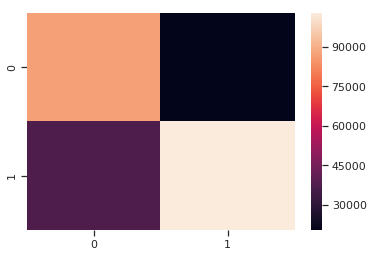

In [33]:
sns.heatmap(confusion_matrix(y_test,y_pred1))

In [28]:
print("Precision score:",precision_score(y_test,y_pred1))

Precision score: 0.8357510263025524


In [37]:
f1_score(y_test, y_pred1, average='weighted') 

0.7693271978982719

In [62]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred1).ravel()

In [67]:
(tn/len(y_test),fp/len(y_test),fn/len(y_test),tp/len(y_test))

(0.3520040736160617,
 0.08181583052463971,
 0.14987512426953759,
 0.416304971589761)

In [61]:
from sklearn.metrics import classification_report
target_names = ['Gluon','Quark']
print(classification_report(y_test, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

       Gluon       0.70      0.81      0.75    107347
       Quark       0.84      0.74      0.78    140099

   micro avg       0.77      0.77      0.77    247446
   macro avg       0.77      0.77      0.77    247446
weighted avg       0.78      0.77      0.77    247446



In [51]:
y_pred = model.predict(X_testNN)
rounded = [round(x[0]) for x in y_pred]
y_pred1 = np.array(rounded,dtype='int64')

'0'

In [41]:
confusion_matrix(y_test,y_pred1)

array([0.30426815], dtype=float32)

In [ ]:
precision_score(y_trainNN,y_pred1)

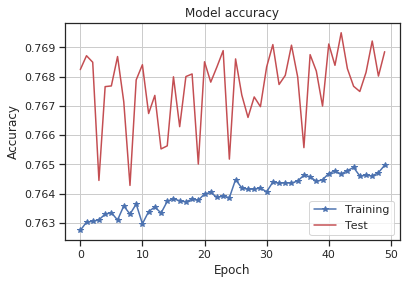

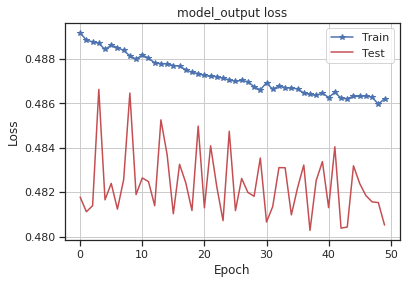

In [43]:
# Plot training & validation accuracy values
plt.plot(model_outputNNDrop1.history['acc'],'*-',label='Training')
plt.plot(model_outputNNDrop1.history['val_acc'],'r-', label='Test')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.grid(True)
plt.savefig("testDrop.png")
plt.show()

# Plot training & validation loss values
plt.plot(model_outputNNDrop1.history['loss'],'*-',label='Training Loss')
plt.plot(model_outputNNDrop1.history['val_loss'],'r-', label='Validation loss')
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.savefig("lossDrop.png")
plt.show()

In [44]:
#defifne a sequential Model
model13 = Sequential()
#increase the number of neurons in the first layer
model13.add(Dense(units=124, activation='relu', input_dim=5))
model13.add(Dense(units=1, activation='sigmoid'))
model13.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model13.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 124)               744       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 125       
Total params: 869
Trainable params: 869
Non-trainable params: 0
_________________________________________________________________


In [45]:
#We train  the model with a non-normalized data
model_outputNNDrop1=model13.fit(X_trainNN,y_trainNN,validation_data=(X_testNN,y_testNN),batch_size=124,epochs=50,verbose=1)

Train on 989784 samples, validate on 247446 samples
Epoch 1/50
989784/989784 [==============================] - 21s 21us/step - loss: 0.5476 - acc: 0.7092 - val_loss: 0.5158 - val_acc: 0.7510
Epoch 2/50
989784/989784 [==============================] - 22s 22us/step - loss: 0.5062 - acc: 0.7539 - val_loss: 0.4964 - val_acc: 0.7596
Epoch 3/50
989784/989784 [==============================] - 22s 23us/step - loss: 0.4938 - acc: 0.7611 - val_loss: 0.4931 - val_acc: 0.7589
Epoch 4/50
989784/989784 [==============================] - 24s 24us/step - loss: 0.4891 - acc: 0.7629 - val_loss: 0.4872 - val_acc: 0.7640
Epoch 5/50
989784/989784 [==============================] - 24s 25us/step - loss: 0.4872 - acc: 0.7640 - val_loss: 0.4858 - val_acc: 0.7660
Epoch 6/50
989784/989784 [==============================] - 25s 26us/step - loss: 0.4865 - acc: 0.7641 - val_loss: 0.4855 - val_acc: 0.7655
Epoch 7/50
989784/989784 [==============================] - 26s 26us/step - loss: 0.4861 - acc: 0.7645 - val

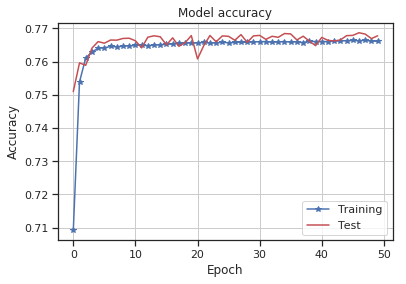

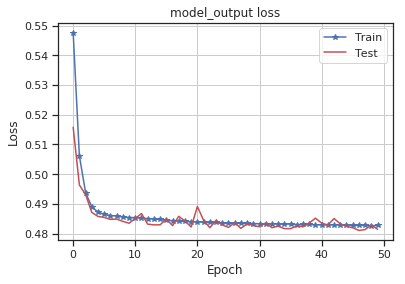

In [46]:
# Plot training & validation accuracy values
plt.plot(model_outputNNDrop1.history['acc'],'*-',label='Training')
plt.plot(model_outputNNDrop1.history['val_acc'],'r-', label='Test')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.grid(True)
plt.savefig("testDrop.png")
plt.show()

# Plot training & validation loss values
plt.plot(model_outputNNDrop1.history['loss'],'*-',label='Training Loss')
plt.plot(model_outputNNDrop1.history['val_loss'],'r-', label='Validation loss')
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.savefig("lossDrop.png")
plt.show()

In [48]:
#defifne a sequential Model
model14 = Sequential()
#increase the number of neurons in the first layer
model14.add(Dense(units=248, activation='relu', input_dim=5))
model14.add(Dense(units=1, activation='sigmoid'))
model14.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model14.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 248)               1488      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 249       
Total params: 1,737
Trainable params: 1,737
Non-trainable params: 0
_________________________________________________________________


In [49]:
#We train  the model with a non-normalized data
model_outputNNDrop2=model14.fit(X_trainNN,y_trainNN,validation_data=(X_testNN,y_testNN),batch_size=124,epochs=100,verbose=1)

Train on 989784 samples, validate on 247446 samples
Epoch 1/100
989784/989784 [==============================] - 22s 23us/step - loss: 0.5424 - acc: 0.7156 - val_loss: 0.5110 - val_acc: 0.7500
Epoch 2/100
989784/989784 [==============================] - 23s 23us/step - loss: 0.5031 - acc: 0.7557 - val_loss: 0.4950 - val_acc: 0.7627
Epoch 3/100
989784/989784 [==============================] - 24s 24us/step - loss: 0.4921 - acc: 0.7613 - val_loss: 0.4938 - val_acc: 0.7621
Epoch 4/100
989784/989784 [==============================] - 25s 25us/step - loss: 0.4882 - acc: 0.7634 - val_loss: 0.4859 - val_acc: 0.7651
Epoch 5/100
989784/989784 [==============================] - 26s 26us/step - loss: 0.4868 - acc: 0.7641 - val_loss: 0.4856 - val_acc: 0.7657
Epoch 6/100
989784/989784 [==============================] - 27s 27us/step - loss: 0.4861 - acc: 0.7645 - val_loss: 0.4873 - val_acc: 0.7648
Epoch 7/100
989784/989784 [==============================] - 28s 28us/step - loss: 0.4857 - acc: 0.764

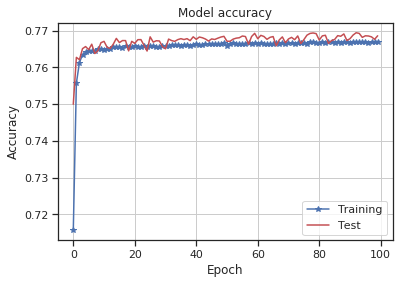

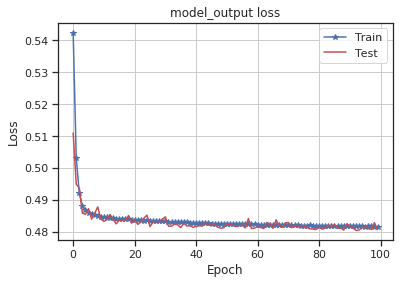

In [50]:
# Plot training & validation accuracy values
plt.plot(model_outputNNDrop2.history['acc'],'*-',label='Training')
plt.plot(model_outputNNDrop2.history['val_acc'],'r-', label='Test')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.grid(True)
plt.savefig("testDrop.png")
plt.show()

# Plot training & validation loss values
plt.plot(model_outputNNDrop2.history['loss'],'*-',label='Training Loss')
plt.plot(model_outputNNDrop2.history['val_loss'],'r-', label='Validation loss')
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.savefig("lossDrop.png")
plt.show()

In [78]:
#defifne a sequential Model
model15 = Sequential()
#increase the number of neurons in the first layer
model15.add(Dense(units=64, activation='relu', input_dim=5))
model15.add(Dense(units=1, activation='sigmoid'))
model15.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model15.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 64)                384       
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 65        
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [79]:
#We train  the model with a non-normalized data
model_outputNNDrop200=model15.fit(X_trainNN,y_trainNN,validation_data=(X_testNN,y_testNN),batch_size=32,epochs=20,verbose=1)

Train on 989784 samples, validate on 247446 samples
Epoch 1/20
989784/989784 [==============================] - 80s 81us/step - loss: 0.5384 - acc: 0.7184 - val_loss: 0.5073 - val_acc: 0.7565
Epoch 2/20
989784/989784 [==============================] - 89s 90us/step - loss: 0.4990 - acc: 0.7577 - val_loss: 0.4927 - val_acc: 0.7657
Epoch 3/20
989784/989784 [==============================] - 87s 88us/step - loss: 0.4904 - acc: 0.7621 - val_loss: 0.4867 - val_acc: 0.7652
Epoch 4/20
989784/989784 [==============================] - 72s 72us/step - loss: 0.4880 - acc: 0.7636 - val_loss: 0.4854 - val_acc: 0.7658
Epoch 5/20
989784/989784 [==============================] - 54s 54us/step - loss: 0.4872 - acc: 0.7635 - val_loss: 0.4864 - val_acc: 0.7643
Epoch 6/20
989784/989784 [==============================] - 52s 53us/step - loss: 0.4866 - acc: 0.7641 - val_loss: 0.4854 - val_acc: 0.7655
Epoch 7/20
989784/989784 [==============================] - 52s 52us/step - loss: 0.4863 - acc: 0.7640 - val

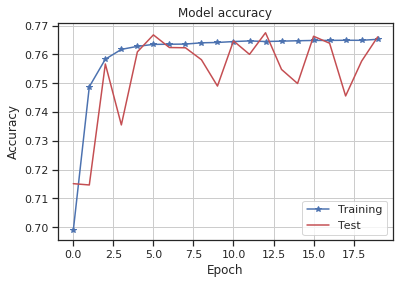

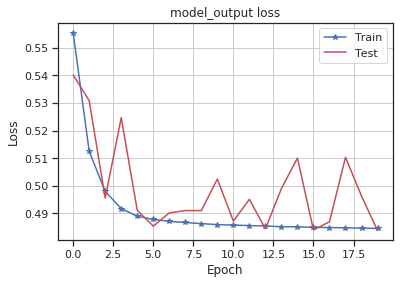

In [62]:
# Plot training & validation accuracy values
plt.plot(model_outputNNDrop200.history['acc'],'*-',label='Training')
plt.plot(model_outputNNDrop200.history['val_acc'],'r-', label='Test')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.grid(True)
plt.savefig("testDrop.png")
plt.show()

# Plot training & validation loss values
plt.plot(model_outputNNDrop200.history['loss'],'*-',label='Training Loss')
plt.plot(model_outputNNDrop200.history['val_loss'],'r-', label='Validation loss')
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.savefig("lossDrop.png")
plt.show()

# Normalized data

In [54]:
#We train  the model with a non-normalized data
model_output=model64.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)

Train on 989784 samples, validate on 247446 samples
Epoch 1/10
989784/989784 [==============================] - 143s 144us/step - loss: 0.5883 - acc: 0.6614 - val_loss: 0.5705 - val_acc: 0.6701
Epoch 2/10
989784/989784 [==============================] - 161s 163us/step - loss: 0.5722 - acc: 0.6708 - val_loss: 0.5689 - val_acc: 0.6724
Epoch 3/10
989784/989784 [==============================] - 133s 134us/step - loss: 0.5686 - acc: 0.6738 - val_loss: 0.5616 - val_acc: 0.6823
Epoch 4/10
989784/989784 [==============================] - 107s 108us/step - loss: 0.5615 - acc: 0.6845 - val_loss: 0.5478 - val_acc: 0.7132
Epoch 5/10
989784/989784 [==============================] - 101s 102us/step - loss: 0.5487 - acc: 0.7054 - val_loss: 0.5519 - val_acc: 0.6995
Epoch 6/10
989784/989784 [==============================] - 102s 103us/step - loss: 0.5425 - acc: 0.7121 - val_loss: 0.5284 - val_acc: 0.7275
Epoch 7/10
989784/989784 [==============================] - 102s 103us/step - loss: 0.5386 - acc

In [66]:
#We train the model by changin the number of iteration
model_outputNN2=model.fit(X_trainNN,y_trainNN,validation_data=(X_testNN,y_testNN),batch_size=20,epochs=20,verbose=1)

Train on 989784 samples, validate on 247446 samples
Epoch 1/20
989784/989784 [==============================] - 111s 112us/step - loss: 0.4964 - acc: 0.7578 - val_loss: 0.4944 - val_acc: 0.7608
Epoch 2/20
989784/989784 [==============================] - 120s 121us/step - loss: 0.4962 - acc: 0.7580 - val_loss: 0.4955 - val_acc: 0.7602
Epoch 3/20
989784/989784 [==============================] - 116s 117us/step - loss: 0.4960 - acc: 0.7586 - val_loss: 0.4942 - val_acc: 0.7613
Epoch 4/20
989784/989784 [==============================] - 98s 99us/step - loss: 0.4958 - acc: 0.7583 - val_loss: 0.4949 - val_acc: 0.7606
Epoch 5/20
989784/989784 [==============================] - 84s 85us/step - loss: 0.4956 - acc: 0.7586 - val_loss: 0.4940 - val_acc: 0.7614
Epoch 6/20
989784/989784 [==============================] - 82s 83us/step - loss: 0.4956 - acc: 0.7586 - val_loss: 0.4936 - val_acc: 0.7609
Epoch 7/20
989784/989784 [==============================] - 83s 84us/step - loss: 0.4954 - acc: 0.7588

In [67]:
#We print the accuracy of the training and validation
print('Training Accuracy : ' , np.mean(model_outputNN2.history["acc"]))
print('Validation Accuracy : ' , np.mean(model_outputNN2.history["val_acc"]))

Training Accuracy :  0.7587923737461251
Validation Accuracy :  0.7606665708270429


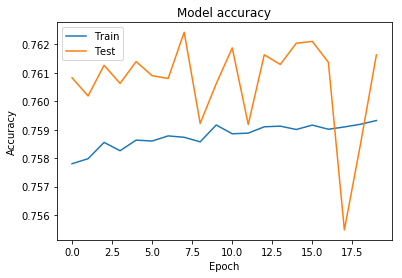

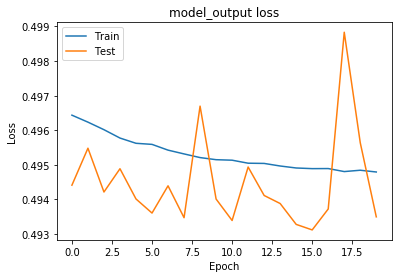

In [68]:
# Plot training & validation accuracy values
plt.plot(model_outputNN2.history['acc'])
plt.plot(model_outputNN2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_outputNN2.history['loss'])
plt.plot(model_outputNN2.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [69]:
#We train by decreasing the number of iteration
model_outputNN3=model.fit(X_trainNN,y_trainNN,validation_data=(X_testNN,y_testNN),batch_size=20,epochs=6,verbose=1)

Train on 989784 samples, validate on 247446 samples
Epoch 1/6
989784/989784 [==============================] - 110s 111us/step - loss: 0.4948 - acc: 0.7592 - val_loss: 0.4939 - val_acc: 0.7596
Epoch 2/6
989784/989784 [==============================] - 121s 123us/step - loss: 0.4947 - acc: 0.7593 - val_loss: 0.4974 - val_acc: 0.7567
Epoch 3/6
989784/989784 [==============================] - 115s 116us/step - loss: 0.4947 - acc: 0.7592 - val_loss: 0.4930 - val_acc: 0.7624
Epoch 4/6
989784/989784 [==============================] - 94s 95us/step - loss: 0.4947 - acc: 0.7591 - val_loss: 0.4927 - val_acc: 0.7621
Epoch 5/6
989784/989784 [==============================] - 82s 83us/step - loss: 0.4946 - acc: 0.7592 - val_loss: 0.4952 - val_acc: 0.7600
Epoch 6/6
989784/989784 [==============================] - 82s 83us/step - loss: 0.4946 - acc: 0.7592 - val_loss: 0.4927 - val_acc: 0.7615


In [70]:
#We print the accuracy
print('Training Accuracy : ' , np.mean(model_outputNN3.history["acc"]))
print('Validation Accuracy : ' , np.mean(model_outputNN3.history["val_acc"]))

Training Accuracy :  0.7592018402254374
Validation Accuracy :  0.7603685933097036


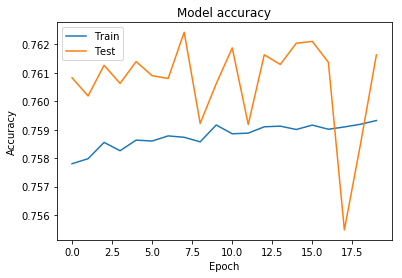

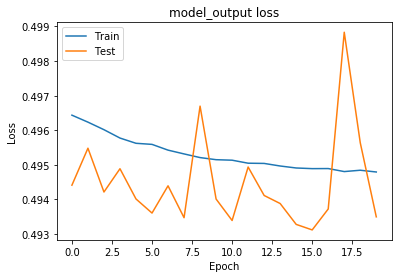

In [71]:
# Plot training & validation accuracy values
plt.plot(model_outputNN2.history['acc'])
plt.plot(model_outputNN2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_outputNN2.history['loss'])
plt.plot(model_outputNN2.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [97]:
#defifne a sequential Model
model5 = Sequential()
#increase the number of neurons in the first layer
model5.add(Dense(units=64, activation='relu', input_dim=5))
model5.add(Dense(units=1, activation='sigmoid'))
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 64)                384       
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 65        
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [98]:
#we train the model by taking 10 iterations
model_outputNN3=model5.fit(X_trainNN,y_trainNN,validation_data=(X_testNN,y_testNN),batch_size=20,epochs=10,verbose=1)

Train on 989784 samples, validate on 247446 samples
Epoch 1/10
989784/989784 [==============================] - 123s 124us/step - loss: 0.5335 - acc: 0.7245 - val_loss: 0.5125 - val_acc: 0.7504
Epoch 2/10
989784/989784 [==============================] - 132s 133us/step - loss: 0.4954 - acc: 0.7592 - val_loss: 0.4909 - val_acc: 0.7596
Epoch 3/10
989784/989784 [==============================] - 114s 115us/step - loss: 0.4898 - acc: 0.7624 - val_loss: 0.4860 - val_acc: 0.7661
Epoch 4/10
989784/989784 [==============================] - 105s 107us/step - loss: 0.4882 - acc: 0.7631 - val_loss: 0.4855 - val_acc: 0.7670
Epoch 5/10
989784/989784 [==============================] - 101s 102us/step - loss: 0.4874 - acc: 0.7633 - val_loss: 0.4868 - val_acc: 0.7651
Epoch 6/10
989784/989784 [==============================] - 110s 111us/step - loss: 0.4870 - acc: 0.7641 - val_loss: 0.4869 - val_acc: 0.7640
Epoch 7/10
989784/989784 [==============================] - 113s 115us/step - loss: 0.4866 - acc

In [99]:
#We print the accuracy
print('Training Accuracy : ' , np.mean(model_outputNN3.history["acc"]))
print('Validation Accuracy : ' , np.mean(model_outputNN3.history["val_acc"]))

Training Accuracy :  0.7592982922886876
Validation Accuracy :  0.7630553746097615


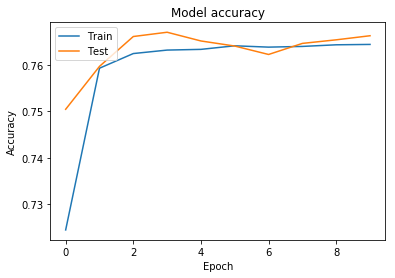

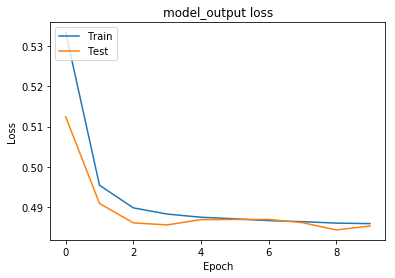

In [100]:
# Plot training & validation accuracy values
plt.plot(model_outputNN3.history['acc'])
plt.plot(model_outputNN3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_outputNN3.history['loss'])
plt.plot(model_outputNN3.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [30]:
model12 = Sequential()
model12.add(Dense(10, input_dim=5, activation='relu'))
model12.add(Dropout(0.3, noise_shape=None, seed=None))
model12.add(Dense(10, activation='relu'))
model12.add(Dropout(0.3, noise_shape=None, seed=None))
model12.add(Dense(1, activation='sigmoid'))
model12.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model12.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                60        
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [33]:
#we train the model by taking 10 iterations
model_outputNN3=model12.fit(X_trainNN,y_trainNN,validation_data=(X_testNN,y_testNN),batch_size=20,epochs=10,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 989784 samples, validate on 247446 samples
Epoch 1/10
989784/989784 [==============================] - 141s 142us/step - loss: 0.5630 - acc: 0.6954 - val_loss: 0.5133 - val_acc: 0.7469
Epoch 2/10
989784/989784 [==============================] - 155s 157us/step - loss: 0.5320 - acc: 0.7350 - val_loss: 0.4984 - val_acc: 0.7608
Epoch 3/10
989784/989784 [==============================] - 135s 137us/step - loss: 0.5266 - acc: 0.7406 - val_loss: 0.4990 - val_acc: 0.7541
Epoch 4/10
989784/989784 [==============================] - 113s 114us/step - loss: 0.5238 - acc: 0.7425 - val_loss: 0.4959 - val_acc: 0.7622
Epoch 5/10
989784/989784 [==============================] - 153s 155us/step - loss: 0.5229 - acc: 0.7432 - val_loss: 0.4987 - val_acc: 0.7616
Epoch 6/10
989784/989784 [==============================] - 116s 117us/step - loss: 0.5225 - acc: 0.7433 - val_loss: 0.4974 - val_acc: 0.7602
Epoch 7/10
989784/989784 [======================

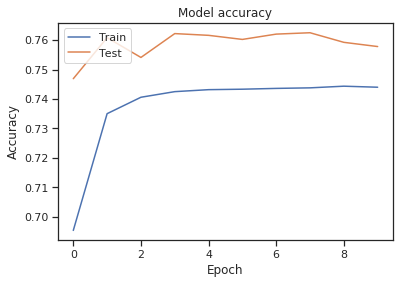

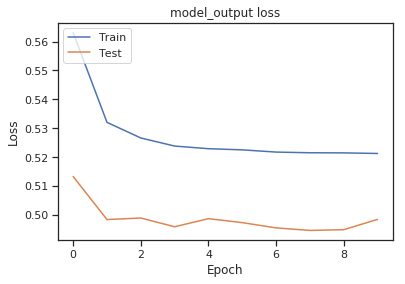

In [34]:
# Plot training & validation accuracy values
plt.plot(model_outputNN3.history['acc'])
plt.plot(model_outputNN3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_outputNN3.history['loss'])
plt.plot(model_outputNN3.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [35]:
#we train the model by taking 10 iterations
model_outputNN3=model12.fit(X_trainNN,y_trainNN,validation_data=(X_testNN,y_testNN),batch_size=20,epochs=50,verbose=1)

Train on 989784 samples, validate on 247446 samples
Epoch 1/50
989784/989784 [==============================] - 138s 139us/step - loss: 0.5213 - acc: 0.7443 - val_loss: 0.4957 - val_acc: 0.7602
Epoch 2/50
989784/989784 [==============================] - 157s 159us/step - loss: 0.5206 - acc: 0.7449 - val_loss: 0.4951 - val_acc: 0.7640
Epoch 3/50
989784/989784 [==============================] - 146s 147us/step - loss: 0.5207 - acc: 0.7443 - val_loss: 0.5019 - val_acc: 0.7603
Epoch 4/50
989784/989784 [==============================] - 113s 115us/step - loss: 0.5208 - acc: 0.7442 - val_loss: 0.4957 - val_acc: 0.7625
Epoch 5/50
989784/989784 [==============================] - 107s 109us/step - loss: 0.5207 - acc: 0.7445 - val_loss: 0.4962 - val_acc: 0.7604
Epoch 6/50
989784/989784 [==============================] - 112s 114us/step - loss: 0.5199 - acc: 0.7454 - val_loss: 0.4958 - val_acc: 0.7626
Epoch 7/50
989784/989784 [==============================] - 102s 103us/step - loss: 0.5198 - acc

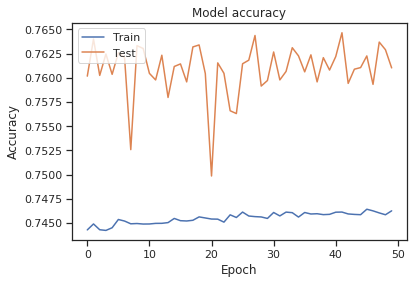

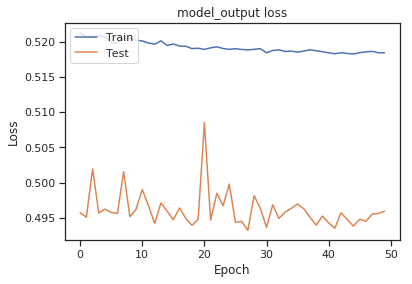

In [36]:
# Plot training & validation accuracy values
plt.plot(model_outputNN3.history['acc'])
plt.plot(model_outputNN3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("train.png")
plt.show()

# Plot training & validation loss values
plt.plot(model_outputNN3.history['loss'])
plt.plot(model_outputNN3.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("loss.png")
plt.show()

In [16]:
#defifne a sequential Model
model13 = Sequential()
#increase the number of neurons in the first layer
model13.add(Dense(units=124, activation='relu', input_dim=5))
model13.add(Dense(units=1, activation='sigmoid'))
model13.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model13.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 124)               744       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 125       
Total params: 869
Trainable params: 869
Non-trainable params: 0
_________________________________________________________________


In [38]:
#we train the model by taking 10 iterations
model_outputNN3=model13.fit(X_trainNN,y_trainNN,validation_data=(X_testNN,y_testNN),batch_size=20,epochs=50,verbose=1)

Train on 989784 samples, validate on 247446 samples
Epoch 1/50
989784/989784 [==============================] - 109s 111us/step - loss: 0.5236 - acc: 0.7342 - val_loss: 0.4993 - val_acc: 0.7517
Epoch 2/50
989784/989784 [==============================] - 115s 116us/step - loss: 0.4920 - acc: 0.7607 - val_loss: 0.4880 - val_acc: 0.7655
Epoch 3/50
989784/989784 [==============================] - 111s 112us/step - loss: 0.4888 - acc: 0.7627 - val_loss: 0.4859 - val_acc: 0.7662
Epoch 4/50
989784/989784 [==============================] - 93s 94us/step - loss: 0.4881 - acc: 0.7627 - val_loss: 0.4859 - val_acc: 0.7638
Epoch 5/50
989784/989784 [==============================] - 88s 89us/step - loss: 0.4875 - acc: 0.7631 - val_loss: 0.4849 - val_acc: 0.7659
Epoch 6/50
989784/989784 [==============================] - 82s 82us/step - loss: 0.4868 - acc: 0.7636 - val_loss: 0.4848 - val_acc: 0.7646
Epoch 7/50
989784/989784 [==============================] - 82s 83us/step - loss: 0.4867 - acc: 0.7637

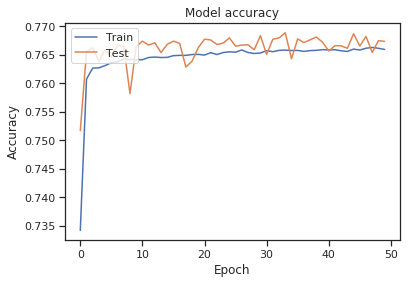

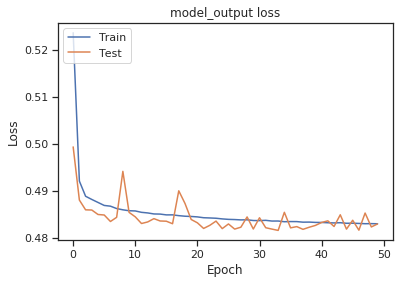

In [39]:
# Plot training & validation accuracy values
plt.plot(model_outputNN3.history['acc'])
plt.plot(model_outputNN3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("train1.png")
plt.show()

# Plot training & validation loss values
plt.plot(model_outputNN3.history['loss'])
plt.plot(model_outputNN3.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("loss1.png")
plt.show()

In [17]:
#defifne a sequential Model
model14 = Sequential()
#increase the number of neurons in the first layer
model14.add(Dense(units=228, activation='relu', input_dim=5))
model14.add(Dense(units=1, activation='sigmoid'))
model14.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model14.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 228)               1368      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 229       
Total params: 1,597
Trainable params: 1,597
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#we train the model by taking 10 iterations
model_outputNN3=model14.fit(X_trainNN,y_trainNN,validation_data=(X_testNN,y_testNN),batch_size=20,epochs=100,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 989784 samples, validate on 247446 samples
Epoch 1/100
989784/989784 [==============================] - 106s 107us/step - loss: 0.5182 - acc: 0.7384 - val_loss: 0.4931 - val_acc: 0.7627
Epoch 2/100
989784/989784 [==============================] - 126s 127us/step - loss: 0.4914 - acc: 0.7607 - val_loss: 0.4872 - val_acc: 0.7642
Epoch 3/100
989784/989784 [==============================] - 127s 128us/step - loss: 0.4891 - acc: 0.7620 - val_loss: 0.4927 - val_acc: 0.7580
Epoch 4/100
989784/989784 [==============================] - 101s 102us/step - loss: 0.4882 - acc: 0.7623 - val_loss: 0.4870 - val_acc: 0.7642
Epoch 5/100
989784/989784 [==============================] - 83s 84us/step - loss: 0.4876 - acc: 0.7629 - val_loss: 0.4925 - val_acc: 0.7593
Epoch 6/100
989784/989784 [==============================] - 82s 82us/step - loss: 0.4872 - acc: 0.7633 - val_loss: 0.4849 - val_acc: 0.7654
Epoch 7/100
989784/989784 [===================

In [33]:
#defifne a sequential Model
model14 = Sequential()
#increase the number of neurons in the first layer
model14.add(Dense(units=64, activation='relu', input_dim=5))
model14.add(Dense(units=64, activation='relu'))
model14.add(Dense(units=64, activation='relu'))
model14.add(Dense(units=64, activation='relu'))
model14.add(Dense(units=64, activation='relu'))
model14.add(Dense(units=64, activation='relu'))
model14.add(Dense(units=64, activation='relu'))
model14.add(Dense(units=64, activation='relu'))
model14.add(Dense(units=64, activation='relu'))
model14.add(Dense(units=64, activation='relu'))
model14.add(Dense(units=1, activation='sigmoid'))
model14.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model14.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                384       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
__________

In [34]:
#we train the model by taking 10 iterations
model_outputNN3=model14.fit(X_trainNN,y_trainNN,validation_data=(X_testNN,y_testNN),batch_size=32,epochs=10,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 989784 samples, validate on 247446 samples
Epoch 1/10
989784/989784 [==============================] - 197s 199us/step - loss: 0.5067 - acc: 0.7478 - val_loss: 0.4940 - val_acc: 0.7588
Epoch 2/10
989784/989784 [==============================] - 194s 196us/step - loss: 0.4925 - acc: 0.7595 - val_loss: 0.4874 - val_acc: 0.7601
Epoch 3/10
989784/989784 [==============================] - 149s 151us/step - loss: 0.4900 - acc: 0.7615 - val_loss: 0.4864 - val_acc: 0.7663
Epoch 4/10
989784/989784 [==============================] - 149s 151us/step - loss: 0.4886 - acc: 0.7621 - val_loss: 0.4811 - val_acc: 0.7678
Epoch 5/10
989784/989784 [==============================] - 141s 142us/step - loss: 0.4872 - acc: 0.7632 - val_loss: 0.4876 - val_acc: 0.7614
Epoch 6/10
989784/989784 [==============================] - 141s 142us/step - loss: 0.4865 - acc: 0.7636 - val_loss: 0.4836 - val_acc: 0.7687
Epoch 7/10
989784/989784 [======================

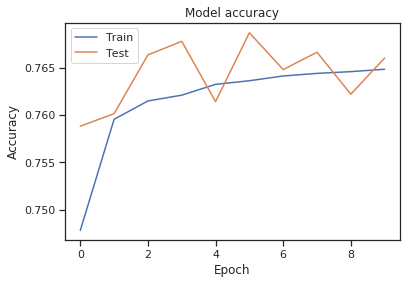

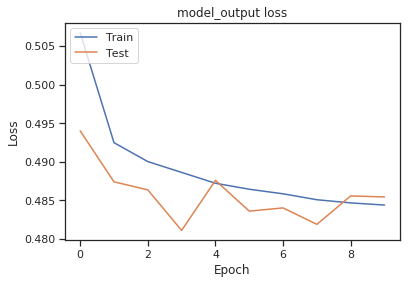

In [35]:
# Plot training & validation accuracy values
plt.plot(model_outputNN3.history['acc'])
plt.plot(model_outputNN3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("train1.png")
plt.show()

# Plot training & validation loss values
plt.plot(model_outputNN3.history['loss'])
plt.plot(model_outputNN3.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("loss1.png")
plt.show()

In [ ]:
#defifne a sequential Model
model15 = Sequential()
#increase the number of neurons in the first layer
model15.add(Dense(units=24, activation='relu', input_dim=5))
model15.add(Dense(units=24, activation='relu'))
model15.add(Dense(units=24, activation='relu'))
model15.add(Dense(units=24, activation='relu'))
model15.add(Dense(units=24, activation='relu'))
model15.add(Dense(units=24, activation='relu'))
model15.add(Dense(units=24, activation='relu'))
model15.add(Dense(units=24, activation='relu'))
model15.add(Dense(units=24, activation='relu'))
model15.add(Dense(units=24, activation='relu'))
model15.add(Dense(units=1, activation='sigmoid'))
model15.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model15.summary()

In [37]:
#we train the model by taking 10 iterations
model_outputNN15=model15.fit(X_trainNN,y_trainNN,validation_data=(X_testNN,y_testNN),batch_size=32,epochs=10,verbose=1)

Train on 989784 samples, validate on 247446 samples
Epoch 1/10
989784/989784 [==============================] - 144s 145us/step - loss: 0.5094 - acc: 0.7437 - val_loss: 0.4871 - val_acc: 0.7651
Epoch 2/10
989784/989784 [==============================] - 169s 171us/step - loss: 0.4930 - acc: 0.7594 - val_loss: 0.4891 - val_acc: 0.7612
Epoch 3/10
989784/989784 [==============================] - 128s 129us/step - loss: 0.4902 - acc: 0.7612 - val_loss: 0.4904 - val_acc: 0.7621
Epoch 4/10
989784/989784 [==============================] - 118s 119us/step - loss: 0.4888 - acc: 0.7620 - val_loss: 0.4901 - val_acc: 0.7605
Epoch 5/10
989784/989784 [==============================] - 137s 138us/step - loss: 0.4878 - acc: 0.7627 - val_loss: 0.4852 - val_acc: 0.7672
Epoch 6/10
989784/989784 [==============================] - 152s 153us/step - loss: 0.4869 - acc: 0.7635 - val_loss: 0.4842 - val_acc: 0.7672
Epoch 7/10
989784/989784 [==============================] - 149s 151us/step - loss: 0.4864 - acc

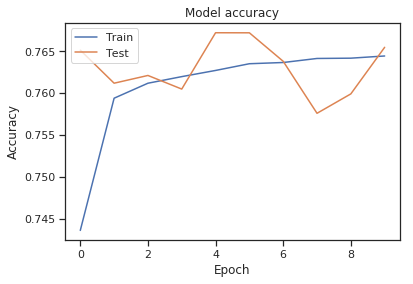

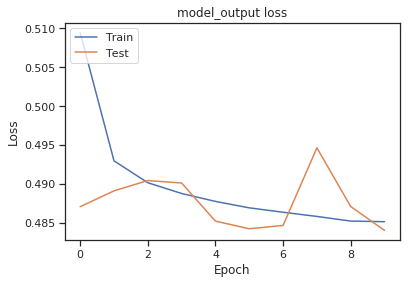

In [38]:
# Plot training & validation accuracy values
plt.plot(model_outputNN15.history['acc'])
plt.plot(model_outputNN15.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("train1.png")
plt.show()

# Plot training & validation loss values
plt.plot(model_outputNN15.history['loss'])
plt.plot(model_outputNN15.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("loss1.png")
plt.show()

In [ ]:
#we train the model by taking 10 iterations
model_outputNN15=model15.fit(X_testNN,y_testNN,validation_data=(X_trainNN,y_trainNN),batch_size=32,epochs=10,verbose=1)

# Training with normalization

In [27]:
#We are using a sequence of layers
model = Sequential()
#we define the layers we want to use for the first test
model.add(Dense(10, input_dim=5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
#let summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 100)               600       
_________________________________________________________________
dense_19 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 101       
Total params: 10,801
Trainable params: 10,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#we train the model with a normailized data
model_output=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)

In [54]:
model = Sequential()
#we define the layers we want to use for the first test 
model.add(Dense(10, input_dim=5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
sgd = optimizers.SGD(lr=0.01)
model.compile(loss='binary_crossentropy', optimizer=sgd,metrics=['accuracy'])

In [55]:
#we train the model with a normailized data
model_output=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=15,verbose=1)

Train on 989784 samples, validate on 247446 samples
Epoch 1/15
989784/989784 [==============================] - 103s 104us/step - loss: 0.6845 - acc: 0.5654 - val_loss: 0.6843 - val_acc: 0.5662
Epoch 2/15
989784/989784 [==============================] - 110s 111us/step - loss: 0.6845 - acc: 0.5654 - val_loss: 0.6842 - val_acc: 0.5662
Epoch 3/15
989784/989784 [==============================] - 109s 110us/step - loss: 0.6845 - acc: 0.5654 - val_loss: 0.6843 - val_acc: 0.5662
Epoch 4/15
989784/989784 [==============================] - 92s 93us/step - loss: 0.6845 - acc: 0.5654 - val_loss: 0.6842 - val_acc: 0.5662
Epoch 5/15
989784/989784 [==============================] - 80s 81us/step - loss: 0.6844 - acc: 0.5654 - val_loss: 0.6842 - val_acc: 0.5662
Epoch 6/15
989784/989784 [==============================] - 81s 82us/step - loss: 0.6844 - acc: 0.5654 - val_loss: 0.6841 - val_acc: 0.5662
Epoch 7/15
989784/989784 [==============================] - 79s 80us/step - loss: 0.6843 - acc: 0.5654

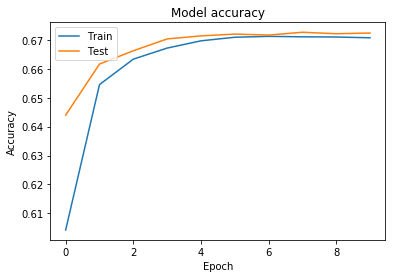

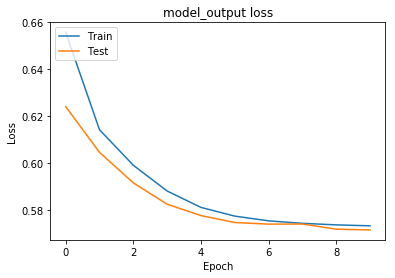

In [25]:
# Plot training & validation accuracy values
plt.plot(model_output.history['acc'])
plt.plot(model_output.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_output.history['loss'])
plt.plot(model_output.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [27]:
#Change of the number of iteration
model_output=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=20,verbose=1)

Train on 989784 samples, validate on 247446 samples
Epoch 1/20
989784/989784 [==============================] - 97s 98us/step - loss: 0.6025 - acc: 0.6494 - val_loss: 0.5682 - val_acc: 0.6706
Epoch 2/20
989784/989784 [==============================] - 66s 67us/step - loss: 0.5717 - acc: 0.6693 - val_loss: 0.5711 - val_acc: 0.6739
Epoch 3/20
989784/989784 [==============================] - 67s 67us/step - loss: 0.5696 - acc: 0.6713 - val_loss: 0.5675 - val_acc: 0.6731
Epoch 4/20
989784/989784 [==============================] - 66s 67us/step - loss: 0.5680 - acc: 0.6725 - val_loss: 0.5627 - val_acc: 0.6746
Epoch 5/20
989784/989784 [==============================] - 68s 69us/step - loss: 0.5660 - acc: 0.6748 - val_loss: 0.5634 - val_acc: 0.6788
Epoch 6/20
989784/989784 [==============================] - 65s 66us/step - loss: 0.5631 - acc: 0.6770 - val_loss: 0.5667 - val_acc: 0.6769
Epoch 7/20
989784/989784 [==============================] - 66s 67us/step - loss: 0.5585 - acc: 0.6830 - val

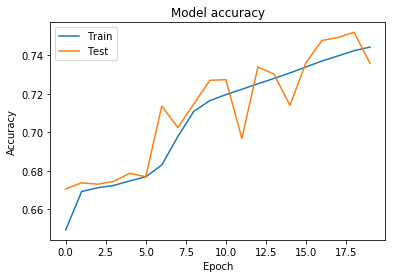

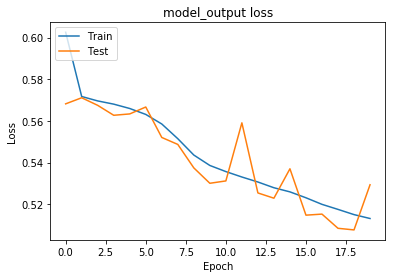

In [29]:
# Plot training & validation accuracy values
plt.plot(model_output.history['acc'])
plt.plot(model_output.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_output.history['loss'])
plt.plot(model_output.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [30]:
#Adding one layer to the last model
model = Sequential()
model.add(Dense(12, input_dim=5, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
#Summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 12)                72        
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [32]:
#We train the model with 10 iterations first
model_output3=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)

Train on 989784 samples, validate on 247446 samples
Epoch 1/10
989784/989784 [==============================] - 98s 99us/step - loss: 0.6029 - acc: 0.6486 - val_loss: 0.5689 - val_acc: 0.6693
Epoch 2/10
989784/989784 [==============================] - 66s 67us/step - loss: 0.5716 - acc: 0.6697 - val_loss: 0.5655 - val_acc: 0.6722
Epoch 3/10
989784/989784 [==============================] - 66s 67us/step - loss: 0.5699 - acc: 0.6712 - val_loss: 0.5656 - val_acc: 0.6720
Epoch 4/10
989784/989784 [==============================] - 65s 66us/step - loss: 0.5684 - acc: 0.6727 - val_loss: 0.5627 - val_acc: 0.6776
Epoch 5/10
989784/989784 [==============================] - 65s 66us/step - loss: 0.5661 - acc: 0.6753 - val_loss: 0.5673 - val_acc: 0.6777
Epoch 6/10
989784/989784 [==============================] - 65s 66us/step - loss: 0.5630 - acc: 0.6804 - val_loss: 0.5587 - val_acc: 0.6895
Epoch 7/10
989784/989784 [==============================] - 66s 66us/step - loss: 0.5576 - acc: 0.6893 - val

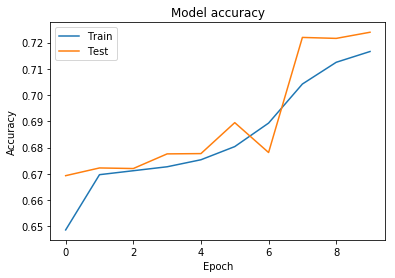

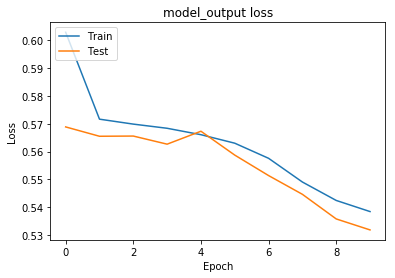

In [37]:
# Plot training & validation accuracy values
plt.plot(model_output3.history['acc'])
plt.plot(model_output3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_output3.history['loss'])
plt.plot(model_output3.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [35]:
#Let change the number of neuron in the first layer
model = Sequential()
model.add(Dense(8, input_dim=5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
#Summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 8)                 48        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [38]:
model_output4=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)

Train on 989784 samples, validate on 247446 samples
Epoch 1/10
989784/989784 [==============================] - 103s 104us/step - loss: 0.6458 - acc: 0.6165 - val_loss: 0.6136 - val_acc: 0.6526
Epoch 2/10
989784/989784 [==============================] - 116s 117us/step - loss: 0.6019 - acc: 0.6599 - val_loss: 0.5907 - val_acc: 0.6643
Epoch 3/10
989784/989784 [==============================] - 112s 113us/step - loss: 0.5852 - acc: 0.6646 - val_loss: 0.5779 - val_acc: 0.6672
Epoch 4/10
989784/989784 [==============================] - 95s 96us/step - loss: 0.5767 - acc: 0.6677 - val_loss: 0.5755 - val_acc: 0.6678
Epoch 5/10
989784/989784 [==============================] - 87s 88us/step - loss: 0.5723 - acc: 0.6700 - val_loss: 0.5690 - val_acc: 0.6751
Epoch 6/10
989784/989784 [==============================] - 78s 79us/step - loss: 0.5695 - acc: 0.6728 - val_loss: 0.5687 - val_acc: 0.6772
Epoch 7/10
989784/989784 [==============================] - 80s 81us/step - loss: 0.5675 - acc: 0.6757

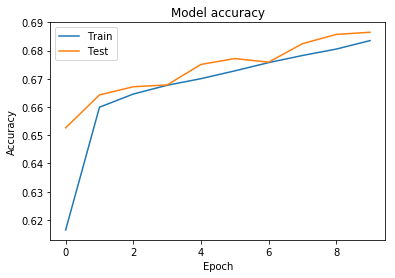

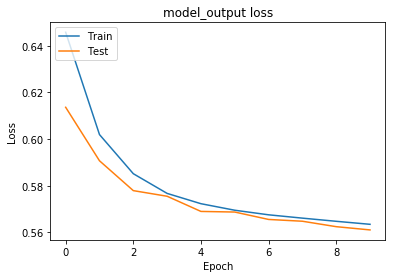

In [39]:
# Plot training & validation accuracy values
plt.plot(model_output4.history['acc'])
plt.plot(model_output4.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_output4.history['loss'])
plt.plot(model_output4.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [41]:
#Let increase small the number of neurons in the first layer
model5 = Sequential()
model5.add(Dense(12, input_dim=5, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 12)                72        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 13        
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


In [42]:
#We fit ou model
model_output=model5.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)

Train on 989784 samples, validate on 247446 samples
Epoch 1/10
989784/989784 [==============================] - 109s 110us/step - loss: 0.6536 - acc: 0.6070 - val_loss: 0.6227 - val_acc: 0.6481
Epoch 2/10
989784/989784 [==============================] - 118s 119us/step - loss: 0.6138 - acc: 0.6546 - val_loss: 0.6043 - val_acc: 0.6611
Epoch 3/10
989784/989784 [==============================] - 114s 115us/step - loss: 0.5989 - acc: 0.6634 - val_loss: 0.5914 - val_acc: 0.6663
Epoch 4/10
989784/989784 [==============================] - 91s 92us/step - loss: 0.5880 - acc: 0.6673 - val_loss: 0.5820 - val_acc: 0.6703
Epoch 5/10
989784/989784 [==============================] - 78s 79us/step - loss: 0.5811 - acc: 0.6696 - val_loss: 0.5774 - val_acc: 0.6716
Epoch 6/10
989784/989784 [==============================] - 79s 80us/step - loss: 0.5773 - acc: 0.6708 - val_loss: 0.5743 - val_acc: 0.6722
Epoch 7/10
989784/989784 [==============================] - 79s 79us/step - loss: 0.5754 - acc: 0.6712

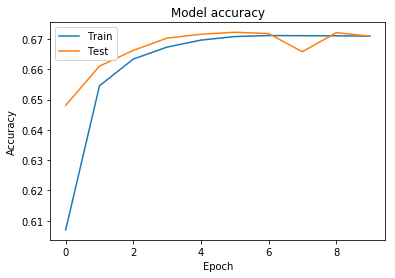

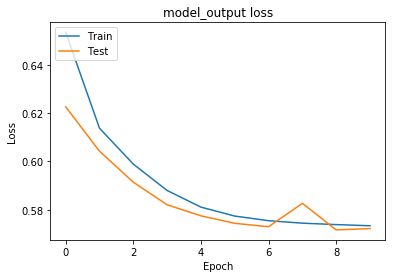

In [43]:
# Plot training & validation accuracy values
plt.plot(model_output.history['acc'])
plt.plot(model_output.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_output.history['loss'])
plt.plot(model_output.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [44]:
#Let increase the number of the hidden layer with the same number of neurons
model6 = Sequential()
model6.add(Dense(12, input_dim=5, activation='relu'))
model6.add(Dense(12, activation='relu'))
model6.add(Dense(12, activation='relu'))
model6.add(Dense(1, activation='sigmoid'))
model6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 12)                72        
_________________________________________________________________
dense_21 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_22 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 13        
Total params: 397
Trainable params: 397
Non-trainable params: 0
_________________________________________________________________


In [48]:
#We fit the model with 10 iterations
model_output=model6.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)

Train on 989784 samples, validate on 247446 samples
Epoch 1/10
989784/989784 [==============================] - 132s 133us/step - loss: 0.5943 - acc: 0.6549 - val_loss: 0.5919 - val_acc: 0.6640
Epoch 2/10
989784/989784 [==============================] - 151s 152us/step - loss: 0.5731 - acc: 0.6696 - val_loss: 0.5794 - val_acc: 0.6707
Epoch 3/10
989784/989784 [==============================] - 126s 127us/step - loss: 0.5708 - acc: 0.6718 - val_loss: 0.5644 - val_acc: 0.6766
Epoch 4/10
989784/989784 [==============================] - 102s 103us/step - loss: 0.5687 - acc: 0.6741 - val_loss: 0.5626 - val_acc: 0.6783
Epoch 5/10
989784/989784 [==============================] - 94s 95us/step - loss: 0.5664 - acc: 0.6781 - val_loss: 0.5601 - val_acc: 0.6820
Epoch 6/10
989784/989784 [==============================] - 98s 99us/step - loss: 0.5620 - acc: 0.6865 - val_loss: 0.5544 - val_acc: 0.6879
Epoch 7/10
989784/989784 [==============================] - 99s 100us/step - loss: 0.5522 - acc: 0.7

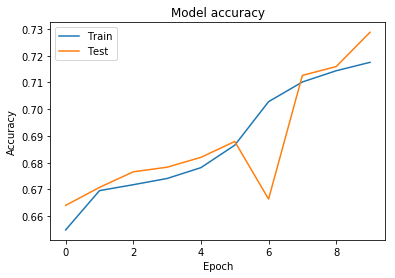

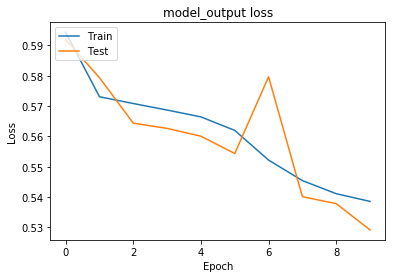

In [49]:
# Plot training & validation accuracy values
plt.plot(model_output.history['acc'])
plt.plot(model_output.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_output.history['loss'])
plt.plot(model_output.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()